# Tarea 1. Machine Learning.

**Profesor:** Julio Erasmo Godoy Del Campo (jugodoy@inf.udec.cl).<br>
**Ayudante:** Alexis Sánchez Rodríguez (alexisanchez@inf.udec.cl).

**Integrante:**

Fecha de entrega: **Domingo 6 de octubre**

**¿Cómo debe subir la tarea?:** La tarea debe ser subida a la plataforma de Canvas en un archivo con el formato **NombreApellido_tarea1.zip**. Este debe contener el código solicitado junto con los datos utilizados.

In [247]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

## Problema 1: Clasificación de estudiantes

El set de datos contiene información respecto a los estudiantes que han ingresado a la facultad de ingeniería. Se le pide que implemente un modelo que permita aprender a clasificar a que cluster pertenece cada alumno de acuerdo a la información que se entrega. Recuerde que por convención la última columna del set de datos representa la etiqueta que usted quiere que el modelo aprenda. También tenga en cuenta que las clases están desbalanceadas y que se espera que usted utilice 60% de los datos para entrenar, el 20% restante para validar y el 20% para testear. Además, presente una matriz de confusión y el f1-score sobre los datos de validación y test.

In [248]:
dataset_1 = pd.read_excel('data/dataset1.xlsx')
dataset_1.head()

,crr_Nom,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster
0,INGENIERIA CIVIL INDUSTRIAL,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2
1,INGENIERIA CIVIL BIOMEDICA,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1
2,INGENIERIA CIVIL QUIMICA,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3
3,INGENIERIA CIVIL ELECTRICA,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2
4,INGENIERIA CIVIL INFORMATICA,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2


**Nota:** Recuerde que este es un proceso iterativo, no lineal, por ende, es muy probable que tenga que volver a pasos anteriores para modificar ciertas cosas.

### Limpieza y exploración de datos

Si dentro de esta etapa toma ciertas decisiones sobre el conjunto de datos, dejelas por escrita.

In [249]:
# Exploración de datos - visualización de columnas y tipos de datos
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   crr_Nom                   7866 non-null   object 
 1   psu_Nem                   7866 non-null   int64  
 2   psu_Leng                  7866 non-null   int64  
 3   psu_Mate                  7866 non-null   int64  
 4   psu_Cie                   7866 non-null   int64  
 5   psu_Pond                  7866 non-null   int64  
 6   Longitud                  7866 non-null   float64
 7   Latitud                   7866 non-null   float64
 8   cred_apr                  7866 non-null   int64  
 9   distancia                 7866 non-null   float64
 10  F                         7866 non-null   int64  
 11  M                         7866 non-null   int64  
 12  PARTICULAR_SUBVENCIONADO  7866 non-null   int64  
 13  PARTICULAR_PAGADO         7866 non-null   int64  
 14  MUNICIPA

In [250]:
# Exploración de datos - valores faltantes
dataset_1.isnull().sum()

crr_Nom                     0
psu_Nem                     0
psu_Leng                    0
psu_Mate                    0
psu_Cie                     0
psu_Pond                    0
Longitud                    0
Latitud                     0
cred_apr                    0
distancia                   0
F                           0
M                           0
PARTICULAR_SUBVENCIONADO    0
PARTICULAR_PAGADO           0
MUNICIPAL                   0
cluster                     0
dtype: int64

In [251]:
# Exploración de datos - registros duplicados
duplicated_df = None

if(dataset_1.duplicated().sum()>0):
    print(f"registros duplicados: {dataset_1.duplicated().sum()}")
    duplicated_df = dataset_1[dataset_1.duplicated(keep=False)]

duplicated_df


registros duplicados: 26


,crr_Nom,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster
207,INGENIERIA CIVIL INFORMATICA,659,646,671,657,661,-73.046415,-36.829532,0,0.913203,0,1,0,1,0,C2
208,INGENIERIA CIVIL INFORMATICA,659,646,671,657,661,-73.046415,-36.829532,0,0.913203,0,1,0,1,0,C2
394,INGENIERÍA CIVIL DE MINAS,637,645,646,589,638,-73.056368,-36.827758,0,1.802762,0,1,1,0,0,C3
395,INGENIERÍA CIVIL DE MINAS,637,645,646,589,638,-73.056368,-36.827758,0,1.802762,0,1,1,0,0,C3
975,INGENIERIA CIVIL EN TELECOMUNICACIONES,558,529,584,521,559,-73.036984,-36.823512,0,0.601167,0,1,0,0,1,C4
976,INGENIERIA CIVIL EN TELECOMUNICACIONES,558,529,584,521,559,-73.036984,-36.823512,0,0.601167,0,1,0,0,1,C4
1833,INGENIERIA CIVIL INFORMATICA,688,624,589,574,642,-72.093500,-36.605462,0,87.795395,0,1,1,0,0,C4
1834,INGENIERIA CIVIL INFORMATICA,688,624,589,574,642,-72.093500,-36.605462,0,87.795395,0,1,1,0,0,C4
2073,INGENIERIA CIVIL MECANICA,723,623,658,582,658,-73.162139,-36.971691,0,19.419172,0,1,1,0,0,C3
2074,INGENIERIA CIVIL MECANICA,723,623,658,582,658,-73.162139,-36.971691,0,19.419172,0,1,1,0,0,C3


In [252]:
# Exploracion de datos - eliminacion de registros duplicados
dataset_1 = dataset_1.drop_duplicates(keep='first')
dataset_1.shape # Se visualiza que hubo una disminucion de 26 registros (los duplicados)

(7840, 16)

#### 1.1 Grafique la distribución de clases.

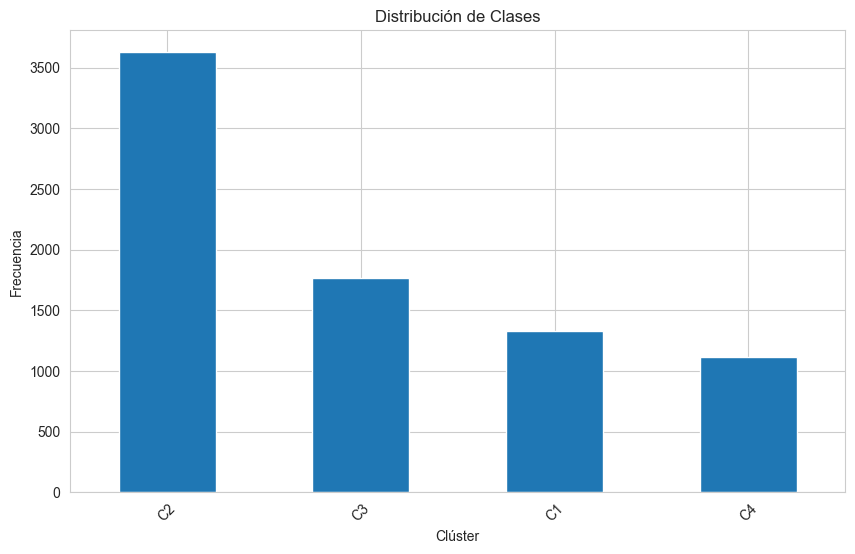

In [253]:
# Frecuencias absolutas de cada cluster
dataset_1['cluster'].value_counts().plot(
    kind='bar',
    figsize=(10, 6),
    title='Distribución de Clases',
    xlabel='Clúster',
    ylabel='Frecuencia',
    rot=45
)
plt.show()

#### 1.2 Identifique valores faltantes.

In [254]:
# En base a la exploracion anterior, no se visualizan valores faltantes
dataset_1.isnull().sum()


crr_Nom                     0
psu_Nem                     0
psu_Leng                    0
psu_Mate                    0
psu_Cie                     0
psu_Pond                    0
Longitud                    0
Latitud                     0
cred_apr                    0
distancia                   0
F                           0
M                           0
PARTICULAR_SUBVENCIONADO    0
PARTICULAR_PAGADO           0
MUNICIPAL                   0
cluster                     0
dtype: int64

#### 1.3 Preprocese los datos para entrenar un algoritmo de Machine Learning.

Se realizaran los siguientes preprocesamientos
1) Codificacion de variables categoricas
3) Correccion del desbalanceo de clases

In [255]:
# Codificacion de variables categoricas
label_encoder_crr_nom = LabelEncoder()
label_encoder_cluster =LabelEncoder()
dataset_1['crr_Nom'] = label_encoder_crr_nom.fit_transform(dataset_1['crr_Nom'])
dataset_1['cluster'] = label_encoder_cluster.fit_transform(dataset_1['cluster'])

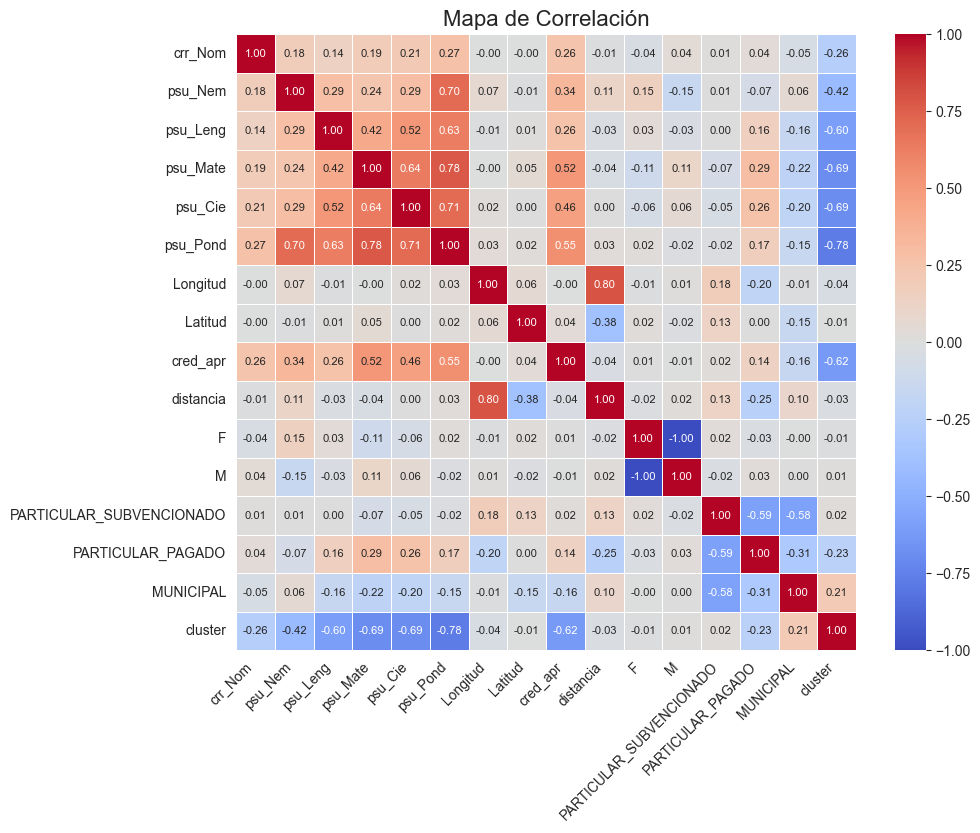

In [256]:
# Seleccion de caracteristicas relevantes
plt.figure(figsize=(10, 8))
correlation_matrix = dataset_1.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 8},
    linewidths=0.5,
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Mapa de Correlación', fontsize=16)
plt.show()

En base al analisis del mapa de correlacion se escoge:
1) reducir las columnas F y M a una sola llamada S (por sexo)
2) eliminar las columnas longitud, latitud y distancia por presentar baja correlacion con cluster

In [257]:
# Reduccion de columnas F y M a S(sexo) 1 para F y 0 para M
dataset_1['S'] = dataset_1['F']
dataset_1 = dataset_1.drop(columns=['F','M'])

# Eliminar las columnas longitud, latitud y distancia
dataset_1 = dataset_1.drop(columns=['Longitud','Latitud','distancia'])

# Mover cluster al final
cluster_col = dataset_1.pop('cluster')
dataset_1['cluster'] = cluster_col

dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7840 entries, 0 to 7865
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   crr_Nom                   7840 non-null   int32
 1   psu_Nem                   7840 non-null   int64
 2   psu_Leng                  7840 non-null   int64
 3   psu_Mate                  7840 non-null   int64
 4   psu_Cie                   7840 non-null   int64
 5   psu_Pond                  7840 non-null   int64
 6   cred_apr                  7840 non-null   int64
 7   PARTICULAR_SUBVENCIONADO  7840 non-null   int64
 8   PARTICULAR_PAGADO         7840 non-null   int64
 9   MUNICIPAL                 7840 non-null   int64
 10  S                         7840 non-null   int64
 11  cluster                   7840 non-null   int32
dtypes: int32(2), int64(10)
memory usage: 735.0 KB


#### 1.4 Divida el conjunto de datos en entrenamiento, validación y test.

In [258]:
X = dataset_1.drop(columns=['cluster'])
y = dataset_1['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelamiento

**Nota 2:** Recuerde que el dataset esta desbalanceado, el cual es un problema típico en la práctica.

Se espera que entrene el modelo con los datos de entrenamiento y busqué los mejores hiperparametros sobre el conjunto de validación. Recuerde utilizar las métricas vistas en clases.

#### 1.5 Entrene el o los algoritmos sobre el conjunto de entrenamiento.

In [259]:
model = RandomForestClassifier(class_weight='balanced', random_state=42) # Entrenar el modelo con las clases balanceadas
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### 1.6 Valide sus resultados.

In [260]:
# Validacion cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy promedio durante validación:", scores.mean())

Accuracy promedio durante validación: 0.7984681370212928


### Modelo en producción

Luego de asegurarse de que encontró los mejores hiperparametros para el modelo, debe ponerlo en producción. Para esto se utilizaran los datos de test (es muy importante que estos datos no hayan sido utilizados antes), ya que esto permite evaluar el desempeño de su modelo sobre datos que no se tienen disponibles en la práctica.

#### 1.7 Pruebe el algoritmo sobre datos con los que no ha trabajado antes (datos de test).

In [261]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       312
           1       0.81      0.89      0.85       709
           2       0.72      0.73      0.72       330
           3       0.81      0.71      0.76       217

    accuracy                           0.81      1568
   macro avg       0.81      0.78      0.79      1568
weighted avg       0.81      0.81      0.81      1568



#### 1.8 Concluya los resultados obtenidos, tanto para el conjunto de validación, como para el conjunto de test.


Los resultados obtenidos muestran que el modelo tiene un desempeño sólido tanto en validación como en el conjunto de prueba, con una precisión promedio ponderada de 0.81 y un F1-score similar, indicando un buen equilibrio entre precisión y recall. Sin embargo, se observa un mejor rendimiento en la clase 1, posiblemente debido a características más representativas o ajustes realizados con class_weight='balanced'. Por otro lado, la clase 2 presenta el F1-score más bajo, lo que indica que podría requerir un análisis más profundo para mejorar su identificación. En general, el modelo generaliza bien, pero hay margen para optimizar las clases menos representadas.

## Problema 2: Prediciendo la demanda de taxis en NYC

En este problema, construiremos un modelo de regresion para predecir el numero de taxis solicitados en la ciudad de Nueva York. Estos modelos suelen ser utiles, por ejemplo, para monitorear el trafico en la ciudad.

Los datos para este problema se encuentran en el archivo `nyc_taxi.csv`. La primera columna indica la hora del dia en minutos, mientras que la segunda columna indica la cantidad de taxis que estan recogiendo pasajeros en ese momento.

Se necesita un modelo que reciba la hora en minutos como predictor y prediga la demanda promedio de taxis para ese momento del día. Los modelos deben ser ajustados en el conjunto de entrenamiento, validados sobre el conjunto de validación y evaluados sobre el conjunto de test. Ademas, la metrica de evaluacion debe ser el $R^2$.

#### 2.1 Cargue los datos y describa la distribucion de los atributos.

In [262]:
data = pd.read_csv('./data/nyc_taxi.csv')
data.sample(2)

,TimeMin,PickupCount
707,410.0,5.0
527,208.0,6.0


#### 2.2 Separe el conjunto de entrenamiento.

In [263]:
X = data[['TimeMin']]
y = data['PickupCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.3 Grafique el conjunto de entrenamiento utilizando un scatter plot.

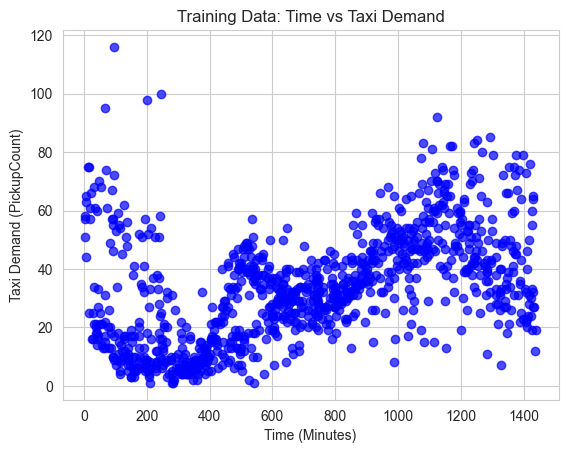

In [264]:
plt.scatter(X_train, y_train, alpha=0.7, color='blue')
plt.xlabel('Time (Minutes)')
plt.ylabel('Taxi Demand (PickupCount)')
plt.title('Training Data: Time vs Taxi Demand')
plt.show()

#### 2.4 Brevemente explique el patron de comportamiento de los datos a lo largo del día.

Existe una baja demanda en las primeras horas del dia (min 0 a 400) existe un incremento gradual en la manana para haber un incremento de alta demanda en la tarde noche (minutos 1000 a 1300)

#### 2.5 En el grafico deberia ver un agujero entre los minutos 500 y 550 donde la demanda es aproximadamente 20-30. Explique el fenomeno.

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TimeMin      1250 non-null   float64
 1   PickupCount  1250 non-null   float64
dtypes: float64(2)
memory usage: 19.7 KB


Posiblemente se deba a un muestreo insuficiente en ese intervalo de tiempo

 #### 2.6 Entrene un modelo de regresion.

In [266]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

#### 2.7 Reporte y explique el valor de $R^2$.

In [267]:
y_pred = model.predict(X_poly)
print("R² Score:", r2_score(y, y_pred))

R² Score: 0.3806180261138534


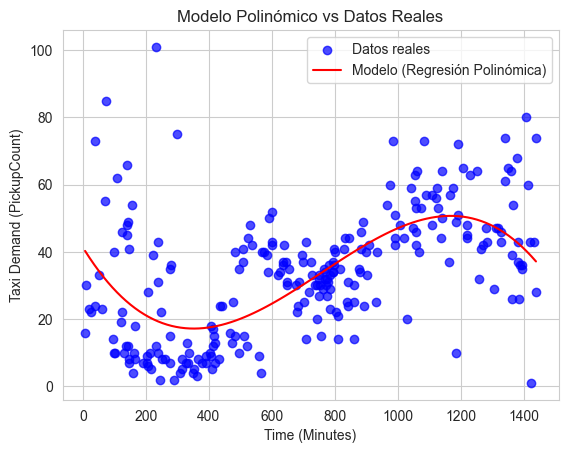

In [270]:
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=X_train.columns)
X_range_poly = poly.transform(X_range_df)
y_pred_line = model.predict(X_range_poly)
plt.scatter(X_test, y_test, alpha=0.7, color='blue', label='Datos reales')
plt.plot(X_range, y_pred_line, color='red', label='Modelo (Regresión Polinómica)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Taxi Demand (PickupCount)')
plt.title('Modelo Polinómico vs Datos Reales')
plt.legend()
plt.show()

#### 2.8 Que significa un $R^2$ = 0? y si fuese negativo?

Un R2 igual a 0 indica que el modelo no explica la variabilidad por lo que las predicciones no son mejores que predecir el promedio de los valores reales por ejemplo. Si R2 es negativo significa que el modelo es peor que dicha prediccion.